# import 

In [1]:
import tabint2
from tabint2.transform import *

In [2]:
import pandas as pd

In [25]:
from tabint2.dataset import *
from tabint2.learner import *
from tabint2.interpretation import *
from tabint2.feature import *

# read data

In [4]:
data = pd.read_csv('Feliz_all.csv')

In [5]:
data.head()

,Level,Design,View,Handover,NFA,project,Price in USD
0,5,1,2,1,76.4,cruz,121460.30
1,6,1,2,1,76.4,cruz,121777.28
2,7,1,2,1,76.4,cruz,122094.27
3,8,1,2,2,76.4,cruz,141684.23
4,9,1,2,2,76.4,cruz,138859.12


Dữ liệu bao gồm số tầng, kiểu thiết kế, hướng cảnh quan, kiểu bàn giao, diện tích nhà, và tên dự án

# data manipulation

In [6]:
data['Level'] = data['Level'].replace('3A', 4).replace('12A', 13).replace('12B', 13).astype(int)

In [7]:
data['Design'] = data['Design'].astype('category').cat.as_ordered()

In [8]:
data['View'] = data['View'].astype('category').cat.as_ordered()

In [9]:
data['Handover'] = data['Handover'].astype('category').cat.as_ordered()

In [10]:
data['project'] = data['project'].astype('category')

In [11]:
x_disp = data[['Level', 'Design', 'View', 'Handover', 'NFA', 'project']]

In [12]:
x = x_disp.copy()
x['project'] = x['project'].cat.codes

In [13]:
x.head()

,Level,Design,View,Handover,NFA,project
0,5,1,2,1,76.4,1
1,6,1,2,1,76.4,1
2,7,1,2,1,76.4,1
3,8,1,2,2,76.4,1
4,9,1,2,2,76.4,1


In [14]:
y = data['Price in USD']

# model

In [15]:
cats = ['Design', 'View', 'Handover', 'project']

In [16]:
ds = TBDataset.from_Split(x, y = y, cats = cats)

The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.


# learner

In [17]:
learner = LGBLearner()
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'num_leaves': 60,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0}

In [18]:
learner.fit_from_ds(ds, params = params, categorical_feature = cats)

Training until validation scores don't improve for 100 rounds.
[100]	training's l2: 1.69029e+09	valid_1's l2: 1.71791e+08
Did not meet early stopping. Best iteration is:
[100]	training's l2: 1.69029e+09	valid_1's l2: 1.71791e+08


# interpretation

In [19]:
ds.features

Index(['Level', 'Design', 'View', 'Handover', 'NFA', 'project'], dtype='object')

In [20]:
Shap = Shapley.from_Tree(learner, ds, df_disp = None , remove_outlier = False)

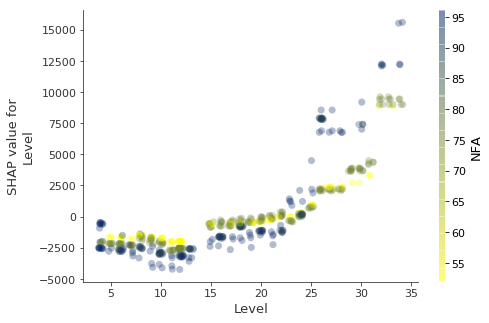

In [21]:
Shap.dependence_plot('Level')

![a](capture.png)

Tầng càng tăng càng khiến cho giá tăng??? Sự khác biệt trong mức giá ở cùng một tầng là do NFA??? \n Vấn đề là do dữ liệu. Các tầng đều có chung một khoảng giá, nhưng càng ở tầng lên cao thì tầng có giá trị lớn hơn càng chiếm nhiều hơn.

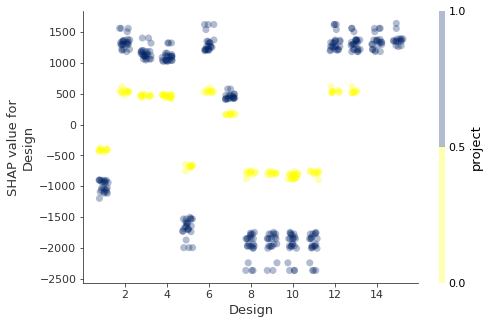

In [22]:
Shap.dependence_plot('Design')

Một số kiểu thiết kế làm tăng giá nhà ít hơn như 1, 5, 8, 9, 10, 11. Một số kiểu khác lại làm tăng giá nhà nhiều hơn như kiểu 2, 3, 4, 7, 12, 13, 14, 15. Tăng nhiều hay ít là tuỳ theo dự án.

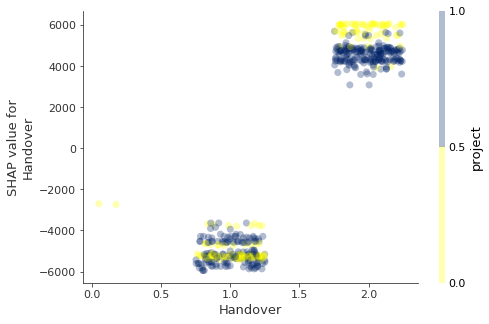

In [24]:
Shap.dependence_plot('Handover')

![a](capture2.png)

HÌnh thức bàn giao nhà có ảnh hưởng tới giá. Loại 2 làm tăng nhiều hơn. Nhưng thực ra mối quan hệ này không quá rõ ràng.

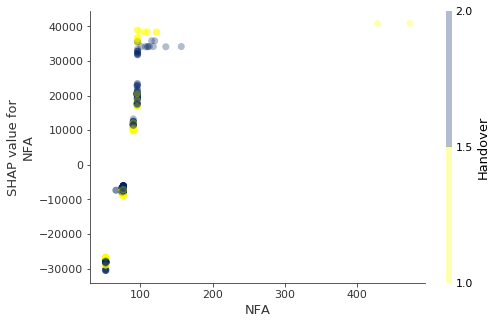

In [29]:
Shap.dependence_plot('NFA')

Nhìn chung diện tích tăng thì giá tăng. Khác biệt về giá trong cùng diện tích là do hình thức bàn giao.

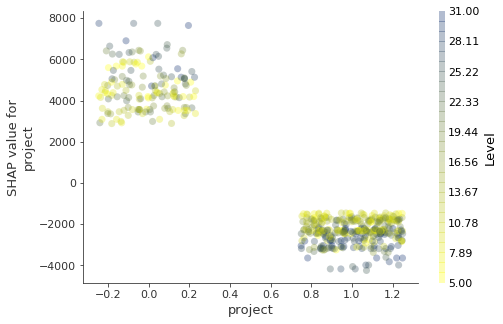

In [30]:
Shap.dependence_plot('project')